In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [199]:
df = pd.read_csv("EtsySoldOrderItems2020-2021-2022.csv")

In [200]:
df.describe()

,Item Model,Quantity,Price,Coupon Code,Discount Amount,Ship Country,Season,Color
count,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2227.000000,2224.000000
mean,12.615177,1.003592,71.017975,19.303098,17.821230,2.750786,1.550516,2.246403
std,10.496164,0.059841,29.852191,11.058905,10.719705,5.052318,1.123359,3.756714
min,1.000000,1.000000,25.330000,0.000000,0.000000,1.000000,0.000000,-1.000000
25%,4.000000,1.000000,52.000000,11.000000,12.010000,1.000000,1.000000,0.000000
50%,11.000000,1.000000,64.000000,22.000000,15.630000,1.000000,2.000000,1.000000
75%,18.000000,1.000000,76.160000,25.000000,19.645000,1.000000,3.000000,3.000000
max,52.000000,2.000000,292.000000,40.000000,126.000000,41.000000,3.000000,16.000000


In [201]:
null_rows = df[df['Color'].isnull()]

In [213]:
null_rows

,Item Model,Quantity,Price,Coupon Code,Discount Amount,Ship Country,Season,Color
659,23,1,59.9,18.0,5.99,3,0,NaN
980,28,1,63.5,30.0,15.88,1,3,NaN
1100,28,1,66.0,28.0,13.20,1,2,NaN


In [202]:
color_map = {"Brown":1,"Gray":2,"Black":3,"Navy Blue":4,"Blue":5,"Yellow":6,"Red":7,"Pink":8,
            "Multicolered":9,"Green":10,"Beige":11,"Purple":12,"Leopar":13,"Multicolored":9,
            "Grey":2,"Multicolor":9,"Rose Gold":14,"Rainbow":15,"White":16,"Genuine Leather":0,\
            "Leather":-1}

In [203]:
reversed_dict = {value: key for key, value in color_map.items()}

In [204]:
def map_color(item):
    x = False
    for color, number in reversed_dict.items():
        if color == item:
            x= True
            return number
    if x == False:
        return 
df["Color"] = df["Color"].apply(map_color)

In [205]:
df.head()

,Item Model,Quantity,Price,Coupon Code,Discount Amount,Ship Country,Season,Color
0,4,1,44.67,1.0,11.17,1,0,Grey
1,1,1,52.00,1.0,13.00,1,0,Brown
2,5,1,55.33,1.0,13.83,1,0,Brown
3,1,1,62.00,1.0,15.50,1,0,Brown
4,7,1,53.00,1.0,13.25,1,0,Genuine Leather


In [206]:
watch_band = df[df["Item Model"] == 7]

In [207]:
colors = watch_band["Color"]

In [208]:
color_percentages = colors.value_counts(normalize=True) * 100

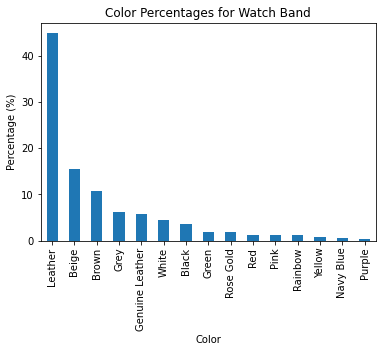

In [209]:
color_percentages.plot(kind='bar')
plt.title("Color Percentages for Watch Band")
plt.xlabel("Color")
plt.ylabel("Percentage (%)")
plt.show()

In [210]:
watch_band.drop(columns=["Item Model","Quantity","Price","Coupon Code","Discount Amount"],inplace= True) 

C:\Users\Hp\AppData\Local\Temp\ipykernel_7852\847824140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  watch_band.drop(columns=["Item Model","Quantity","Price","Coupon Code","Discount Amount"],inplace= True)


In [211]:
dummy_color = pd.get_dummies(watch_band, columns=["Color"],prefix="",prefix_sep ="")

In [212]:
dummy_color.head(2)

,Ship Country,Season,Beige,Black,Brown,Genuine Leather,Green,Grey,Leather,Navy Blue,Pink,Purple,Rainbow,Red,Rose Gold,White,Yellow
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
